<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Multiclass_Classification_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-17 22:18:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  27.5MB/s    in 21s     

2024-07-17 22:18:29 (24.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"image shape is {img.shape}")

  return img

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['324125.jpg']
image shape is (384, 512, 3)


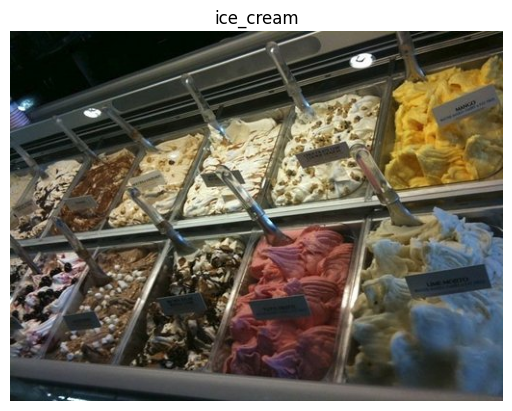

In [7]:
import random
img = random_image(target_dir = train_dir,
                   target_class = random.choice(class_names))

# **Preproces the data**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **Create a model**

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam

In [10]:
model1= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3, activation = 'relu'),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

In [11]:
model1.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [12]:
model1.fit(train_data,epochs = 5, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 158ms/step - loss: 2.1883 - accuracy: 0.1857 - val_loss: 2.1031 - val_accuracy: 0.2180
Epoch 2/5
235/235 [==============================] - 27s 117ms/step - loss: 1.9996 - accuracy: 0.2871 - val_loss: 2.0313 - val_accuracy: 0.2736
Epoch 3/5
235/235 [==============================] - 33s 139ms/step - loss: 1.7103 - accuracy: 0.4117 - val_loss: 1.8690 - val_accuracy: 0.3488
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 1.2486 - accuracy: 0.5819 - val_loss: 2.0017 - val_accuracy: 0.3464
Epoch 5/5
235/235 [==============================] - 28s 117ms/step - loss: 0.7250 - accuracy: 0.7631 - val_loss: 2.6730 - val_accuracy: 0.3004


# **Next Model**
Increase max pool and epochs


In [13]:
model2= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3, activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

In [14]:
model2.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [15]:
model2.fit(train_data,epochs = 10, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 28s 112ms/step - loss: 2.1523 - accuracy: 0.2104 - val_loss: 2.0109 - val_accuracy: 0.2776
Epoch 2/10
235/235 [==============================] - 27s 115ms/step - loss: 1.9294 - accuracy: 0.3243 - val_loss: 1.8867 - val_accuracy: 0.3320
Epoch 3/10
235/235 [==============================] - 26s 112ms/step - loss: 1.8148 - accuracy: 0.3705 - val_loss: 1.8803 - val_accuracy: 0.3416
Epoch 4/10
235/235 [==============================] - 28s 119ms/step - loss: 1.7326 - accuracy: 0.4020 - val_loss: 1.8443 - val_accuracy: 0.3708
Epoch 5/10
235/235 [==============================] - 28s 117ms/step - loss: 1.6628 - accuracy: 0.4240 - val_loss: 1.9062 - val_accuracy: 0.3396
Epoch 6/10
235/235 [==============================] - 26s 111ms/step - loss: 1.5943 - accuracy: 0.4479 - val_loss: 1.8951 - val_accuracy: 0.3452
Epoch 7/10
235/235 [==============================] - 27s 117ms/step - loss: 1.5184 - accuracy: 0.4779 - val_loss: 1.8991 - val_ac

Remove CNN layers

In [1]:
model3= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

NameError: name 'Sequential' is not defined

In [17]:
model3.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [18]:
model3.fit(train_data,epochs = 10, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 28s 116ms/step - loss: 2.1533 - accuracy: 0.2299 - val_loss: 2.0485 - val_accuracy: 0.2736
Epoch 2/10
235/235 [==============================] - 28s 118ms/step - loss: 1.7347 - accuracy: 0.4155 - val_loss: 1.9315 - val_accuracy: 0.3088
Epoch 3/10
235/235 [==============================] - 28s 117ms/step - loss: 1.2459 - accuracy: 0.5969 - val_loss: 2.1740 - val_accuracy: 0.3024
Epoch 4/10
235/235 [==============================] - 27s 117ms/step - loss: 0.7184 - accuracy: 0.7849 - val_loss: 2.5832 - val_accuracy: 0.2800
Epoch 5/10
235/235 [==============================] - 27s 117ms/step - loss: 0.3615 - accuracy: 0.9047 - val_loss: 3.0893 - val_accuracy: 0.2796
Epoch 6/10
235/235 [==============================] - 27s 114ms/step - loss: 0.1776 - accuracy: 0.9607 - val_loss: 3.7333 - val_accuracy: 0.2740
Epoch 7/10
235/235 [==============================] - 27s 116ms/step - loss: 0.0815 - accuracy: 0.9840 - val_loss: 4.4416 - val_ac

# **Model 4**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Remove CNN layers

In [15]:
model3= Sequential([

     Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
     MaxPool2D(2),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(2),
     Flatten(),
     Dense(len(class_names),'softmax')


])

In [ ]:
model3.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [ ]:
model3.fit(train_data,epochs = 10, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 28s 116ms/step - loss: 2.1533 - accuracy: 0.2299 - val_loss: 2.0485 - val_accuracy: 0.2736
Epoch 2/10
235/235 [==============================] - 28s 118ms/step - loss: 1.7347 - accuracy: 0.4155 - val_loss: 1.9315 - val_accuracy: 0.3088
Epoch 3/10
235/235 [==============================] - 28s 117ms/step - loss: 1.2459 - accuracy: 0.5969 - val_loss: 2.1740 - val_accuracy: 0.3024
Epoch 4/10
235/235 [==============================] - 27s 117ms/step - loss: 0.7184 - accuracy: 0.7849 - val_loss: 2.5832 - val_accuracy: 0.2800
Epoch 5/10
235/235 [==============================] - 27s 117ms/step - loss: 0.3615 - accuracy: 0.9047 - val_loss: 3.0893 - val_accuracy: 0.2796
Epoch 6/10
235/235 [==============================] - 27s 114ms/step - loss: 0.1776 - accuracy: 0.9607 - val_loss: 3.7333 - val_accuracy: 0.2740
Epoch 7/10
235/235 [==============================] - 27s 116ms/step - loss: 0.0815 - accuracy: 0.9840 - val_loss: 4.4416 - val_ac

In [10]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [11]:
import tensorflow as tf

In [17]:
# Clone the model (use the same architecture)
model4 = tf.keras.models.clone_model(model3)

# Compile the cloned model (same setup as used for model_10)
model4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history4 = model4.fit(train_data_augmented, # use augmented data
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 340s 1s/step - loss: 2.2048 - accuracy: 0.2163 - val_loss: 1.9974 - val_accuracy: 0.2840
Epoch 2/10
235/235 [==============================] - 339s 1s/step - loss: 2.0503 - accuracy: 0.2704 - val_loss: 1.9322 - val_accuracy: 0.3396
Epoch 3/10
235/235 [==============================] - 356s 2s/step - loss: 2.0196 - accuracy: 0.2908 - val_loss: 1.8744 - val_accuracy: 0.3504
Epoch 4/10
235/235 [==============================] - 347s 1s/step - loss: 1.9827 - accuracy: 0.3141 - val_loss: 1.8437 - val_accuracy: 0.3556
Epoch 5/10
235/235 [==============================] - 338s 1s/step - loss: 1.9494 - accuracy: 0.3241 - val_loss: 1.8651 - val_accuracy: 0.3584
Epoch 6/10
 94/235 [===========>..................] - ETA: 3:10 - loss: 1.9392 - accuracy: 0.3281

KeyboardInterrupt: 